# Proposed project - Modeling Grocery Store Closures

A continuation of my analysis using USDA's food access atlas and crime stats.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
df_access = pd.read_excel('foodAtlas.xls',sheet_name='ACCESS')

In [4]:
df_store = pd.read_excel('foodAtlas.xls',sheet_name='STORES')

In [62]:
df_crime = pd.read_csv('crime_data_w_population_and_crime_rate_cleaned.csv')

In [6]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 39 columns):
FIPS                                                      3143 non-null int64
State                                                     3143 non-null object
County                                                    3143 non-null object
Grocery stores 2009                                       3143 non-null int64
Grocery stores 2014                                       3143 non-null int64
Grocery stores (% change) 2009-14                         3123 non-null float64
Grocery stores/1000 pop 2009                              3143 non-null float64
Grocery stores/1000 pop 2014                              3143 non-null float64
Grocery stores/1000 pop (% change) 2009-14                3128 non-null float64
Supercenters & club stores 2009                           3143 non-null int64
Supercenters & club stores 2014                           3143 non-null int64
Supercenters & club store

In [63]:
df_crime.rename(columns={'county_name': 'County', 'Unnamed: 1': 'State'}, inplace=True)

In [64]:
df_crime.drop(['index',
               'EDITION',
               'PART',
               'IDNO',
               'INDEX',
               'MODINDX',
               'FIPS_ST',
               'FIPS_CTY'],axis=1,inplace=True)

In [29]:
df_store['Grocery change'] = df_store.apply(lambda x: x['Grocery stores 2009'] - x['Grocery stores 2014'], axis=1)

In [30]:
df_store['Grocery change'].head(10)

0    2
1   -5
2    0
3    1
4    0
5    0
6    0
7   -2
8    0
9   -1
Name: Grocery change, dtype: int64

In [31]:
df = pd.merge(df_crime,df_store[['County', 'State','Grocery change']],on=['County', 'State'], how='left')

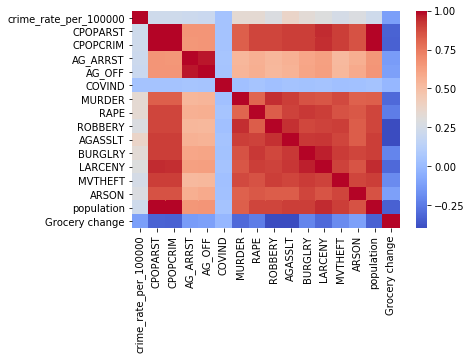

In [32]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [33]:
df_store['Supercenters change'] = df_store.apply(lambda x: x['Supercenters & club stores 2009'] - x['Supercenters & club stores 2014'], axis=1)

In [34]:
df = pd.merge(df_crime,df_store[['County', 'State','Supercenters change']],on=['County', 'State'], how='left')

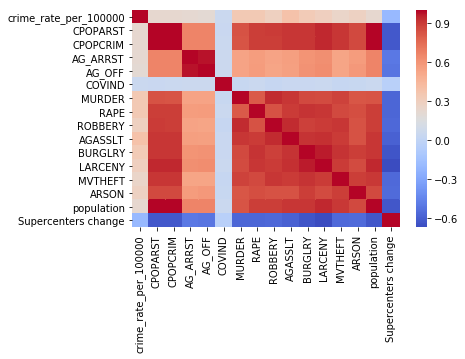

In [35]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [36]:
df_store['Convenience change'] = df_store.apply(lambda x: x['Convenience stores 2009'] - x['Convenience stores 2014'], axis=1)

In [37]:
df = pd.merge(df_crime,df_store[['County', 'State','Convenience change']],on=['County', 'State'], how='left')

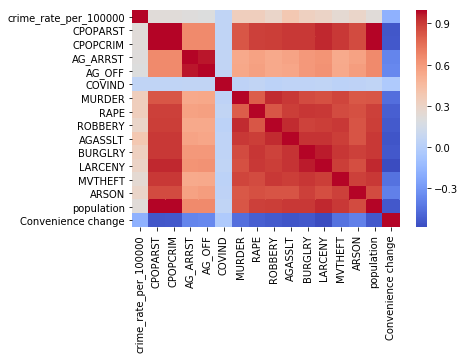

In [38]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [39]:
df_store['Specialized change'] = df_store.apply(lambda x: x['Specialized food stores 2009'] - x['Specialized food stores 2014'], axis=1)

In [40]:
df = pd.merge(df_crime,df_store[['County', 'State','Specialized change']],on=['County', 'State'], how='left')

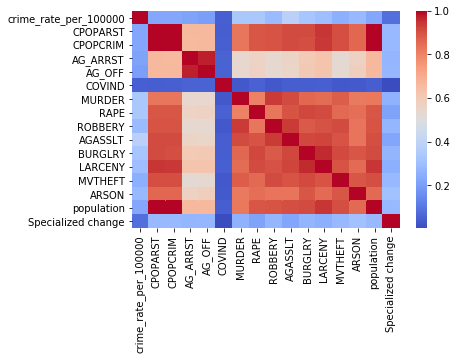

In [41]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [42]:
df_store['SNAP change'] = df_store.apply(lambda x: x['SNAP-authorized stores 2012'] - x['SNAP-authorized stores 2016'], axis=1)

In [43]:
df = pd.merge(df_crime,df_store[['County', 'State','SNAP change']],on=['County', 'State'], how='left')

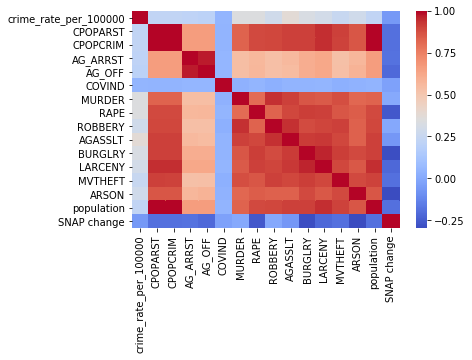

In [44]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [45]:
df_store['WIC change'] = df_store.apply(lambda x: x['WIC-authorized stores 2008'] - x['WIC-authorized stores 2012'], axis=1)

In [46]:
df = pd.merge(df_crime,df_store[['County', 'State','WIC change']],on=['County', 'State'], how='left')

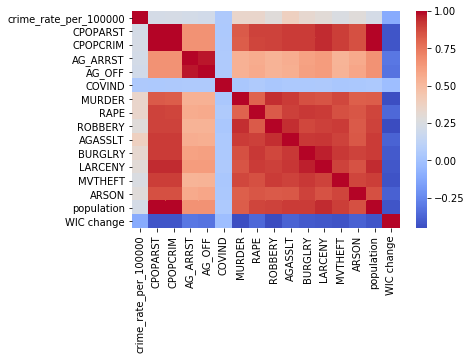

In [47]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)

In [48]:
df_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 44 columns):
FIPS                                                             3143 non-null int64
State                                                            3143 non-null object
County                                                           3143 non-null object
Population low access to store 2010                              3143 non-null float64
Population low access to store 2015                              3124 non-null float64
Population low access to store (% change) 2010 -15               3117 non-null float64
Population low access to store (%) 2010                          3143 non-null float64
Population low access to store (%) 2015                          3124 non-null float64
Low income & low access to store 2010                            3143 non-null float64
Low income & low access to store 2015                            3123 non-null float64
Low income & low access to 

In [58]:
df_access_2010_2015 = df_access.drop(['Population low access to store (% change) 2010 -15',
                                'Population low access to store (%) 2010',
                                'Population low access to store (%) 2015',
                                'Low income & low access to store (% change) 2010 - 15',
                                'Low income & low access to store (%) 2010',
                                'Low income & low access to store (%) 2015',
                                'Households no car & low access to store (% change) 2010 - 15',
                                'Households no car & low access to store (%) 2010',
                                'Households no car & low access to store (%) 2015',
                                'SNAP households low access to store (%) 2015',
                                'Children low access to store (% change) 2010 - 15',
                                'Children low access to store (%) 2010',
                                'Children low access to store (%) 2015',
                                'Seniors low access to store (% change) 2010 -15',
                                'Seniors low access to store (%) 2010',
                                'Seniors low access to store (%) 2015',
                                'White low access to store (%) 2015',
                                'Black low access to store (%) 2015',
                                'Hispanic ethnicity low access to store (%) 2015',
                                'Asian low access to store (%) 2015',
                                'American Indian or Alaska Native low access to store (%) 2015',
                                'Hawaiian or Pacific Islander low access to store (%) 2015',
                                'Multiracial low access to store (%) 2015'],axis=1)

In [59]:
df_access_2010_2015.columns

Index(['FIPS', 'State', 'County', 'Population low access to store 2010',
       'Population low access to store 2015',
       'Low income & low access to store 2010',
       'Low income & low access to store 2015',
       'Households no car & low access to store 2010',
       'Households no car & low access to store 2015',
       'SNAP households low access to store 2015',
       'Children low access to store 2010',
       'Children low access to store 2015', 'Seniors low access to store 2010',
       'Seniors low access to store 2015', 'White low access to store 2015',
       'Black low access to store 2015',
       'Hispanic ethnicity low access to store 2015',
       'Asian low access to store 2015',
       'American Indian or Alaska Native low access to store 2015',
       'Hawaiian or Pacific Islander low access to store 2015',
       'Multiracial low access to store 2015'],
      dtype='object')

In [65]:
df_crime = pd.merge(df_crime, df_access_2010_2015, how='right', on=['County', 'State'])

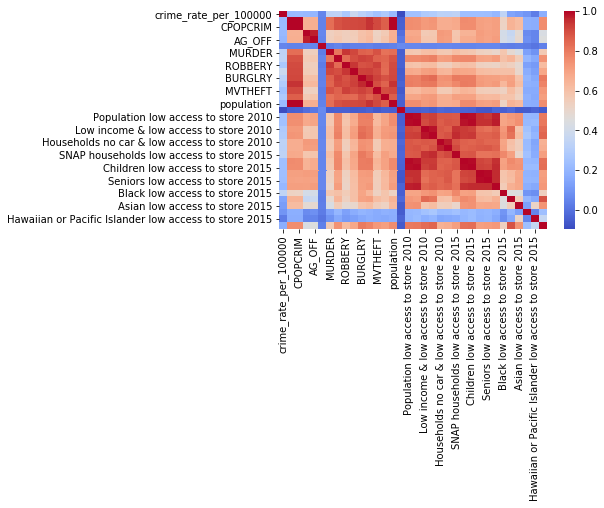

In [66]:
sns.heatmap(df_crime.corr(),cmap='coolwarm',annot=False)

In [67]:
df_crime.columns

Index(['County', 'State', 'crime_rate_per_100000', 'CPOPARST', 'CPOPCRIM',
       'AG_ARRST', 'AG_OFF', 'COVIND', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT',
       'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population', 'FIPS',
       'Population low access to store 2010',
       'Population low access to store 2015',
       'Low income & low access to store 2010',
       'Low income & low access to store 2015',
       'Households no car & low access to store 2010',
       'Households no car & low access to store 2015',
       'SNAP households low access to store 2015',
       'Children low access to store 2010',
       'Children low access to store 2015', 'Seniors low access to store 2010',
       'Seniors low access to store 2015', 'White low access to store 2015',
       'Black low access to store 2015',
       'Hispanic ethnicity low access to store 2015',
       'Asian low access to store 2015',
       'American Indian or Alaska Native low access to store 2015',
       'Hawaiian or P

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


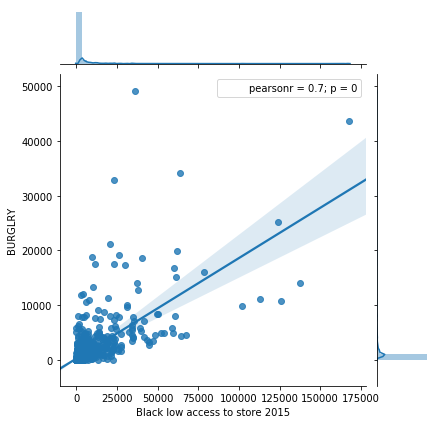

In [55]:
sns.jointplot(x='Black low access to store 2015',
              y='BURGLRY',
              data=df_crime,kind='reg')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


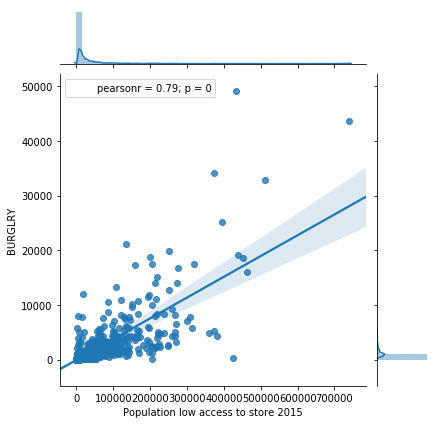

In [56]:
sns.jointplot(x='Population low access to store 2015',
              y='BURGLRY',
              data=df_crime,kind='reg')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


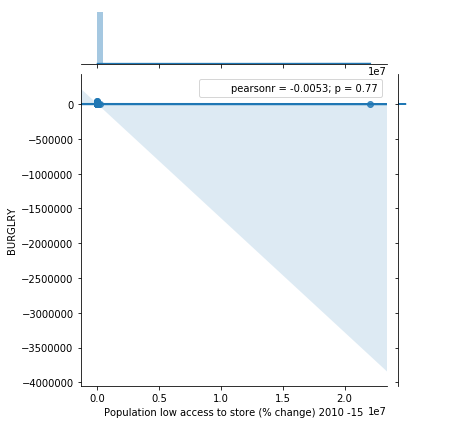

In [57]:
sns.jointplot(x='Population low access to store (% change) 2010 -15',
              y='BURGLRY',
              data=df_crime,kind='reg')

In [68]:
df_crime['Population low access change'] = df_crime.apply(lambda x: x['Population low access to store 2010'] - x['Population low access to store 2015'], axis=1)

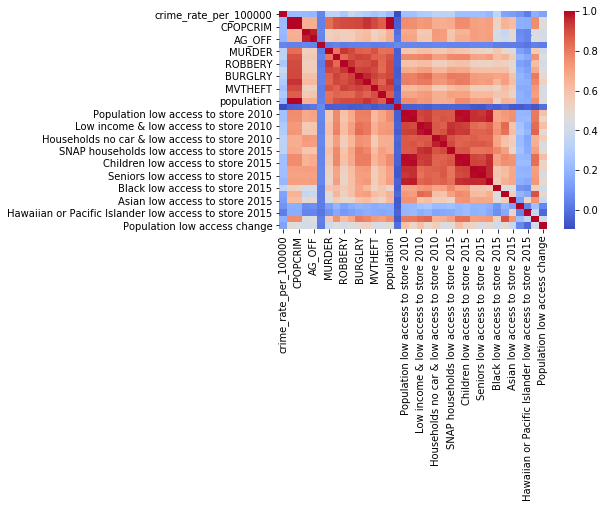

In [69]:
sns.heatmap(df_crime.corr(),cmap='coolwarm',annot=False)